In [ ]:
%pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48463 sha256=cc23830643e9d70408e0f6326aaa941212e731552eb370dfe3e778ba4dbf7d6e
  Stored in directory: /root/.cache/pip/wheels/11/16/21/615e29f0001ed6258b25d2a3a84ccfd65c5469b3505d4ab3ab
Successfully built pykalman


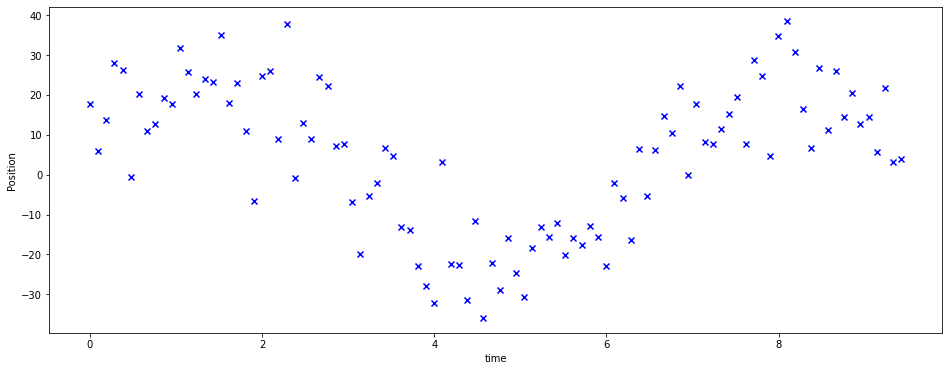

In [ ]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

rnd = np.random.RandomState(0)
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
y = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
pl.figure(figsize=(16, 6))
pl.scatter(x,y, marker='x', color='b', label='observations')
pl.xlabel('time')
pl.ylabel('Position')
pl.show()

In [ ]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(y).smooth(y)[0]

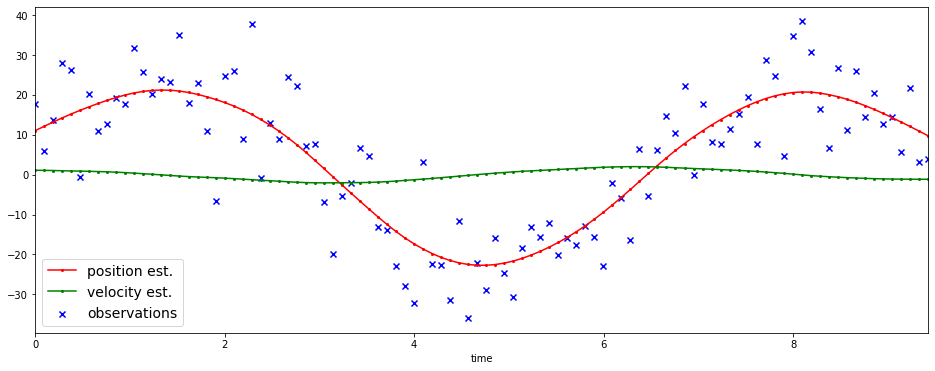

In [ ]:
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],markersize=2,
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

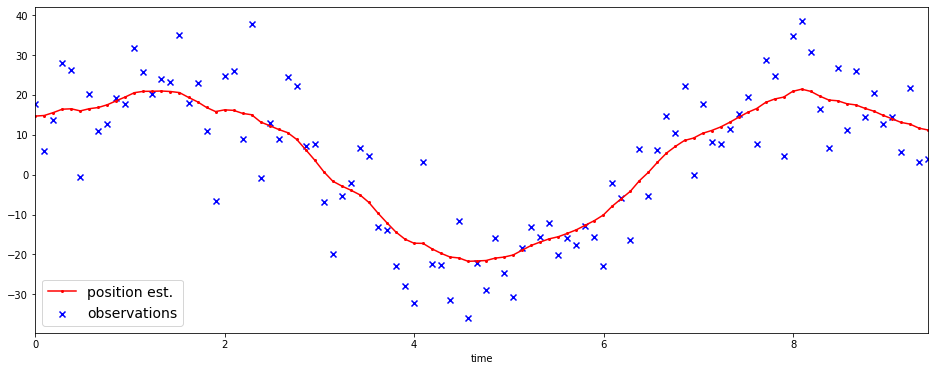

In [ ]:
kf = KalmanFilter(transition_matrices=[1],
                  transition_covariance=0.01)
states_pred = kf.em(y).smooth(y)[0]
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred,markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()